In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [281]:

airbnb = pd.read_csv("https://raw.githubusercontent.com/mehreengillani/Data602/refs/heads/main/Airbnb_site_hotel%20new.csv")
airbnb.head(5)

/var/folders/6w/rkqvbjtx04s93768hcryddtc0000gn/T/ipykernel_6278/613760289.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv("https://raw.githubusercontent.com/mehreengillani/Data602/refs/heads/main/Airbnb_site_hotel%20new.csv")


,id,name,host_id,host_name,city,price,reply time,guest favourite,host since,host Certification,...,total reviewers number,accommodates,bathrooms,bedrooms,beds,listing number,host response rate,host acceptance rate,sales,area
0,1,Beautiful Victorian Home,1368256,Robert,Toronto,250,0.0,0,4563,1.0,...,47,6,"1,5",2,3,1,"0,9","0,42",102,North America
1,2,"World Class @ CN Tower, convention centre, The...",113345,Adela,Toronto,152,0.0,0,5120,1.0,...,42,4,1,1,2,5,"0,9","0,42",166,North America
2,3,Furnished room in lovely Annex house June -Oct31,1466410,Susan,Toronto,120,0.0,0,4534,1.0,...,0,1,1,1,2,2,1,"0,65",181,North America
3,4,Executive Studio Unit- Ideal for One Person,118124,Brent,Toronto,75,1.0,1,5111,1.0,...,29,1,1,0,1,1,1,1,365,North America
4,5,"Bright Beaches Apt, close to everything",175687,John,Toronto,90,0.0,0,5033,1.0,...,7,2,1,1,1,4,1,"0,8",328,North America


In [282]:
#summary
airbnb.describe()

,id,host_id,reply time,guest favourite,host since,host Certification,room_type,host total listings count,total reviewers number,accommodates,bedrooms,beds,listing number,sales
count,86186.000000,8.618600e+04,66867.000000,86186.000000,86186.000000,82903.0,86186.000000,86186.000000,86186.000000,86186.000000,86186.000000,86186.000000,86186.000000,86186.000000
mean,43093.500000,1.959076e+08,0.769857,0.273304,2380.740236,1.0,2.663959,23.492737,36.414174,3.412747,1.247407,1.914441,45.196772,183.385086
std,24879.899487,1.849803e+08,0.420928,0.445658,1269.305372,0.0,0.524877,73.067586,75.989911,2.393287,1.093598,1.732507,258.312637,119.302210
min,1.000000,1.581000e+03,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,21547.250000,2.890381e+07,1.000000,0.000000,1422.000000,1.0,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,80.000000
50%,43093.500000,1.308280e+08,1.000000,0.000000,2540.000000,1.0,3.000000,3.000000,9.000000,2.000000,1.000000,1.000000,3.000000,193.000000
75%,64639.750000,3.492982e+08,1.000000,1.000000,3337.000000,1.0,3.000000,12.000000,37.000000,4.000000,2.000000,2.000000,15.000000,287.000000
max,86186.000000,5.752345e+08,1.000000,1.000000,5745.000000,1.0,4.000000,837.000000,2575.000000,16.000000,21.000000,60.000000,4818.000000,365.000000


In [283]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86186 entries, 0 to 86185
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         86186 non-null  int64  
 1   name                       86186 non-null  object 
 2   host_id                    86186 non-null  int64  
 3   host_name                  86186 non-null  object 
 4   city                       86186 non-null  object 
 5   price                      80762 non-null  object 
 6   reply time                 66867 non-null  float64
 7   guest favourite            86186 non-null  int64  
 8   host since                 86186 non-null  int64  
 9   host Certification         82903 non-null  float64
 10  room_type                  86186 non-null  int64  
 11  host total listings count  86186 non-null  int64  
 12  consumer                   35421 non-null  object 
 13  total reviewers number     86186 non-null  int

In [284]:
print("Initial dataset shape:", airbnb.shape)



Initial dataset shape: (86186, 23)


# Data Cleaning

In [285]:
# lets drop non-essential columns 
# Columns to drop
cols_to_drop = [ 'id',
    'name', 'host_name', 'sales', 
    'listing number',
    'host Certification'
]
# Drop columns
airbnb = airbnb.drop(columns=cols_to_drop, errors='ignore')

In [286]:
airbnb.shape

(86186, 17)

# Handling missing values

In [287]:
# Step 2: Initial Data Assessment
print("Missing values before cleaning:")
print(airbnb.isnull().sum().sort_values(ascending=False))

print("\nDataset overview:")
print(f"Total rows: {len(airbnb)}")
print(f"Total columns: {len(airbnb.columns)}")

Missing values before cleaning:
consumer                     50765
reply time                   19319
price                         5424
accommodates                     0
host acceptance rate             0
host response rate               0
beds                             0
bedrooms                         0
bathrooms                        0
host_id                          0
total reviewers number           0
city                             0
host total listings count        0
room_type                        0
host since                       0
guest favourite                  0
area                             0
dtype: int64

Dataset overview:
Total rows: 86186
Total columns: 17


In [288]:
# Step 3: Handle Missing Values

# Create a copy for cleaning
df = airbnb.copy()

# Check percentage of missing values
missing_pct = (df.isnull().sum() / len(df)) * 100
print("Missing value percentage:")
print(missing_pct.sort_values(ascending=False).round(2))

Missing value percentage:
consumer                     58.90
reply time                   22.42
price                         6.29
accommodates                  0.00
host acceptance rate          0.00
host response rate            0.00
beds                          0.00
bedrooms                      0.00
bathrooms                     0.00
host_id                       0.00
total reviewers number        0.00
city                          0.00
host total listings count     0.00
room_type                     0.00
host since                    0.00
guest favourite               0.00
area                          0.00
dtype: float64


Analyze Missing Value Patterns and Prioritize Columns

Based on percentages missing value, here's the initial analysis and prioritization:

consumer (58.90%) - Very high missing rate - delete column
reply time (22.42%) - High missing rate - fill unknown
Moderate Missing (5-20%) - Imputation Candidates

price (6.29%) - Critical feature, needs careful imputation
host Certification (3.81%) - Moderate missing
Low/No Missing (<5%) - Safe to Keep

All other columns (0% missing) - No action needed

In [289]:
# Drop consumer column
df = df.drop(columns=['consumer'])

df['reply time'] = df['reply time'].fillna(df['reply time'].median())
# convert to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Group imputation 
df['price'] = df.groupby(['city', 'room_type', 'accommodates'])['price'] \
                .transform(lambda x: x.fillna(x.median()))
# Fill remaining with more granular groups
if df['price'].isnull().any():
    df['price'] = df.groupby(['bedrooms', 'bathrooms'])['price'] \
                    .transform(lambda x: x.fillna(x.median()))

# Final fill with global median if still missing
df['price'] = df['price'].fillna(df['price'].median())


<Axes: ylabel='Frequency'>

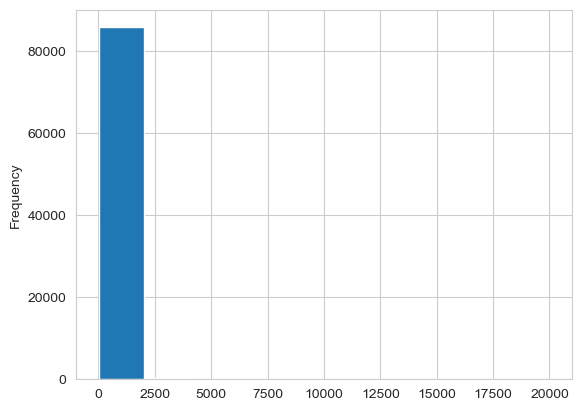

In [290]:
df['price'].plot.hist()

<Axes: ylabel='Frequency'>

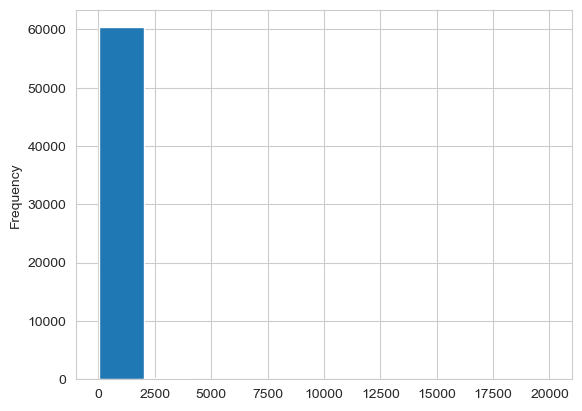

In [291]:
airbnb['price'] = pd.to_numeric(airbnb['price'], errors='coerce')
airbnb['price'].plot.hist()

<Axes: ylabel='Frequency'>

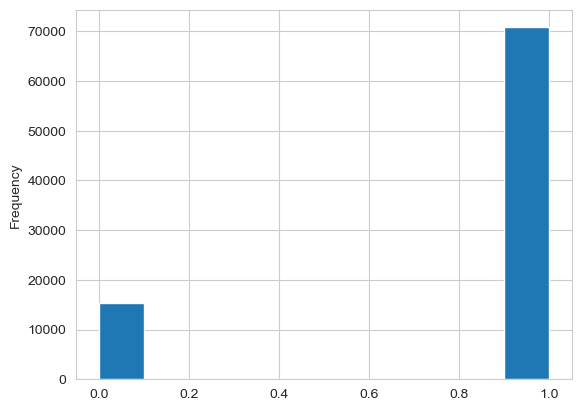

In [292]:
df['reply time'].plot.hist()

<Axes: ylabel='Frequency'>

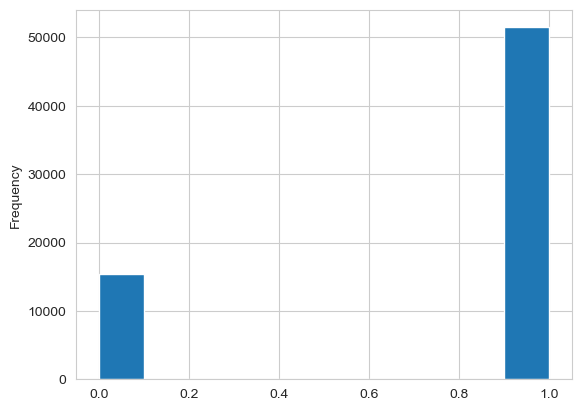

In [293]:
airbnb['reply time'].plot.hist()

In [294]:
df.isnull().sum()

host_id                      0
city                         0
price                        0
reply time                   0
guest favourite              0
host since                   0
room_type                    0
host total listings count    0
total reviewers number       0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
host response rate           0
host acceptance rate         0
area                         0
dtype: int64

No More missing data

In [295]:
airbnb['reply time'].describe()

count    66867.000000
mean         0.769857
std          0.420928
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: reply time, dtype: float64

In [296]:
df['reply time'].describe()

count    86186.000000
mean         0.821444
std          0.382982
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: reply time, dtype: float64

In [297]:
# For reply time only
compare_reply = pd.concat([
    airbnb['reply time'].agg(['mean', 'median', 'std']).to_frame().T,
    df['reply time'].agg(['mean', 'median', 'std']).to_frame().T
], axis=0, keys=['Original', 'Imputed'])

print("Reply Time Comparison:")
print(compare_reply)

# For price only
compare_price = pd.concat([
    airbnb['price'].agg(['mean', 'median', 'std']).to_frame().T,
    df['price'].agg(['mean', 'median', 'std']).to_frame().T
], axis=0, keys=['Original', 'Imputed'])

print("\nPrice Comparison:")
print(compare_price)

Reply Time Comparison:
                         mean  median       std
Original reply time  0.769857     1.0  0.420928
Imputed  reply time  0.821444     1.0  0.382982

Price Comparison:
                      mean  median         std
Original price  237.786491   151.0  409.849573
Imputed  price  207.272715   140.0  351.881539


In [298]:
# Assuming original data in 'airbnb' and imputed in 'df'
original = airbnb[['reply time', 'price']].copy()
imputed = df[['reply time', 'price']].copy()

# Compare with percentage change
compare = pd.concat([
    original.agg(['mean', 'median', 'std']).T,
    imputed.agg(['mean', 'median', 'std']).T
], axis=1, keys=['Original', 'Imputed'])

# Calculate percentage change
pct_change = ((compare['Imputed'] - compare['Original']) / compare['Original'] * 100).round(2)
pct_change.columns = ['% Change Mean', '% Change Median', '% Change Std']

# Flatten the multi-level columns
compare.columns = [' '.join(col).strip() for col in compare.columns.values]

# Combine and format
result = pd.concat([compare, pct_change], axis=1)

# Create formatted table
table = pd.DataFrame({
    'Metric': result.index,
    'Original Mean': result['Original mean'].round(2),
    'Imputed Mean': result['Imputed mean'].round(2),
    'Mean % Change': result['% Change Mean'],
    'Original Median': result['Original median'].round(2),
    'Imputed Median': result['Imputed median'].round(2),
    'Median % Change': result['% Change Median'],
    'Original Std': result['Original std'].round(2),
    'Imputed Std': result['Imputed std'].round(2),
    'Std % Change': result['% Change Std']
})

print("Comparison Table:")
print("=" * 110)
print(table.to_string(index=False))
print("=" * 110)

Comparison Table:
    Metric  Original Mean  Imputed Mean  Mean % Change  Original Median  Imputed Median  Median % Change  Original Std  Imputed Std  Std % Change
reply time           0.77          0.82           6.70              1.0             1.0             0.00          0.42         0.38         -9.01
     price         237.79        207.27         -12.83            151.0           140.0            -7.28        409.85       351.88        -14.14



reply time: Mean increased 6.7% (0.77 → 0.82): More listings now classified as "reply within 1 day"
Median unchanged at 1: Majority still reply within day
Std decreased 9% (0.42 → 0.38): Less variability, data more consistent

Price: Reduced by 12.8% (mean) and 7.3% (median), variability decreased by 14.1%


Key Insights:

Price imputation removed high outliers, lowering both mean and median
Reply time imputation filled missing values with median

Both has change less than 15 % so we will continue with that

In [299]:
print(df.columns.tolist())

['host_id', 'city', 'price', 'reply time', 'guest favourite', 'host since', 'room_type', 'host total listings count', 'total reviewers number', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'host response rate', 'host acceptance rate', 'area']


In [300]:
df.drop(columns=['host since'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86186 entries, 0 to 86185
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_id                    86186 non-null  int64  
 1   city                       86186 non-null  object 
 2   price                      86186 non-null  float64
 3   reply time                 86186 non-null  float64
 4   guest favourite            86186 non-null  int64  
 5   room_type                  86186 non-null  int64  
 6   host total listings count  86186 non-null  int64  
 7   total reviewers number     86186 non-null  int64  
 8   accommodates               86186 non-null  int64  
 9   bathrooms                  86186 non-null  object 
 10  bedrooms                   86186 non-null  int64  
 11  beds                       86186 non-null  int64  
 12  host response rate         86186 non-null  object 
 13  host acceptance rate       86186 non-null  obj

In [301]:
# Step 3.2: Convert grouping columns to consistent data types
print("\n=== CONVERTING DATA TYPES ===")

df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')

for col in ['host response rate', 'host acceptance rate']:
    df[col] = df[col].str.replace(',', '.')  # Replace comma with dot
    df[col] = df[col].str.rstrip('%').astype(float) / 100

# Ensure area is string (categorical)
df['area'] = df['area'].astype(str)

print(df.dtypes)


=== CONVERTING DATA TYPES ===
host_id                        int64
city                          object
price                        float64
reply time                   float64
guest favourite                int64
room_type                      int64
host total listings count      int64
total reviewers number         int64
accommodates                   int64
bathrooms                    float64
bedrooms                       int64
beds                           int64
host response rate           float64
host acceptance rate         float64
area                          object
dtype: object


In [302]:
df['area'].value_counts()

area
North America    35421
Asia             27071
Europe           23694
Name: count, dtype: int64

In [303]:
df[['price', 'reply time', 'bathrooms']].describe()

,price,reply time,bathrooms
count,86186.000000,86186.000000,77197.000000
mean,207.272715,0.821444,1.012008
std,351.881539,0.382982,0.744027
min,9.000000,0.000000,0.000000
25%,80.000000,1.000000,1.000000
50%,140.000000,1.000000,1.000000
75%,232.000000,1.000000,1.000000
max,20000.000000,1.000000,20.000000


In [304]:
# Use 99th percentile as upper cap (removes extreme outliers but keeps high-end listings)
price_99th = df['price'].quantile(0.99)
print(f"99.5th percentile: ${price_99th:.2f}")

99.5th percentile: $1296.45


In [305]:
# Cap price at 99th percentile ($1296.45)
df['price'] = df['price'].clip(upper=price_99th)

In [306]:
df['price'].describe()

count    86186.000000
mean       194.667340
std        196.527202
min          9.000000
25%         80.000000
50%        140.000000
75%        232.000000
max       1296.450000
Name: price, dtype: float64

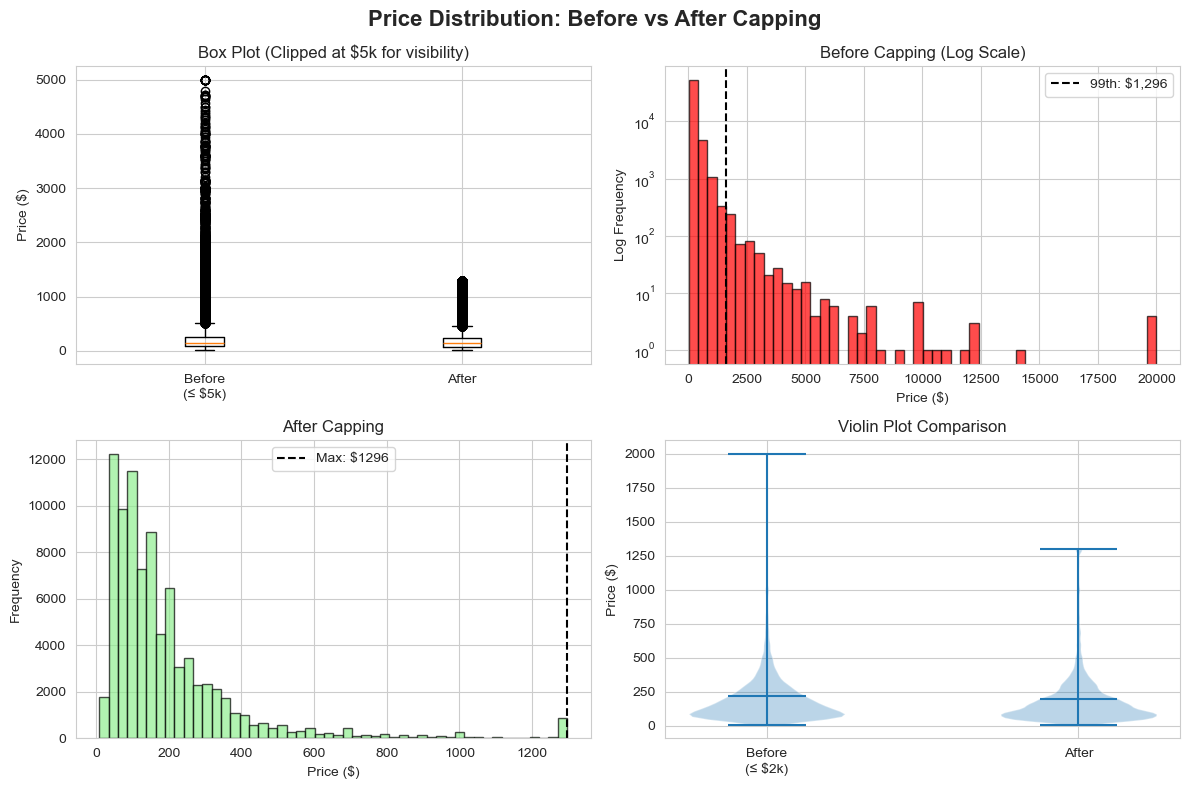

Outlier Analysis:
Listings > $1,296 (99th percentile): 855
Listings > $5,000: 53
Listings > $10,000: 12
Maximum price before: $20,000.00
Maximum price after: $1,296.45


In [308]:
price_before = airbnb['price'].copy()
price_after = df['price'].copy()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Price Distribution: Before vs After Capping', fontsize=16, fontweight='bold')

# 1. Box plot with better scaling
bp = axes[0, 0].boxplot([price_before[price_before <= 5000], price_after], 
                       tick_labels=['Before\n(≤ $5k)', 'After'])
axes[0, 0].set_title('Box Plot (Clipped at $5k for visibility)')
axes[0, 0].set_ylabel('Price ($)')

# 2. Log-scale histogram before
axes[0, 1].hist(price_before, bins=50, alpha=0.7, color='red', edgecolor='black', log=True)
axes[0, 1].axvline(price_before.quantile(0.99), color='black', linestyle='--', label='99th: $1,296')
axes[0, 1].set_title('Before Capping (Log Scale)')
axes[0, 1].set_xlabel('Price ($)')
axes[0, 1].set_ylabel('Log Frequency')
axes[0, 1].legend()

# 3. Histogram after (normal scale)
axes[1, 0].hist(price_after, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].axvline(price_after.max(), color='black', linestyle='--', label=f'Max: ${price_after.max():.0f}')
axes[1, 0].set_title('After Capping')
axes[1, 0].set_xlabel('Price ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# 4. Violin plot for better distribution comparison
violin_data = [price_before[price_before <= 2000], price_after]
violin = axes[1, 1].violinplot(violin_data, showmeans=True)
axes[1, 1].set_xticks([1, 2])
axes[1, 1].set_xticklabels(['Before\n(≤ $2k)', 'After'])
axes[1, 1].set_title('Violin Plot Comparison')
axes[1, 1].set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

# Show outliers impact
print("Outlier Analysis:")
print("="*50)
print(f"Listings > $1,296 (99th percentile): {len(price_before[price_before > 1296.45]):,}")
print(f"Listings > $5,000: {len(price_before[price_before > 5000]):,}")
print(f"Listings > $10,000: {len(price_before[price_before > 10000]):,}")
print(f"Maximum price before: ${price_before.max():,.2f}")
print(f"Maximum price after: ${price_after.max():,.2f}")

In [309]:
print(f"Duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Duplicate rows: 5153


In [310]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [311]:
# Skewness check
from scipy.stats import skew
print("\nSkewness:")
for col in ['price', 'accommodates', 'bedrooms', 'bathrooms']:
    print(f"{col}: {skew(df[col].dropna()):.2f}")


Skewness:
price: 3.06
accommodates: 1.98
bedrooms: 1.84
bathrooms: 2.72


In [312]:
df['bathrooms'].describe()

count    72152.000000
mean         1.014275
std          0.724072
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         20.000000
Name: bathrooms, dtype: float64

In [313]:
# Use 99.5th percentile as upper cap (removes extreme outliers but keeps high-end listings)
bathrooms_99th = df['bathrooms'].quantile(0.995)
print(f"99th percentile for bathrooms: {bathrooms_99th:.2f}")

99th percentile for bathrooms: 4.00


In [314]:
# Cap bathrooms at 4 (covers 99.5% of realistic listings)
df['bathrooms'] = df['bathrooms'].clip(upper=bathrooms_99th)

In [315]:
df['bedrooms'].describe()

count    81033.000000
mean         1.272309
std          1.104481
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         21.000000
Name: bedrooms, dtype: float64

In [316]:
# Use 99.5th percentile as upper cap (removes extreme outliers but keeps high-end listings)
bedrooms_99th = df['bedrooms'].quantile(0.995)
print(f"99th percentile for bathrooms: {bedrooms_99th:.2f}")

99th percentile for bathrooms: 5.00


In [317]:
# Cap bathrooms at 4 (covers 99.5% of realistic listings)
df['bedrooms'] = df['bedrooms'].clip(upper=bedrooms_99th)

In [318]:
df['bedrooms'].describe()

count    81033.000000
mean         1.263584
std          1.057923
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: bedrooms, dtype: float64

In [319]:
df['accommodates'].describe()

count    81033.000000
mean         3.493577
std          2.412827
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

In [320]:
# Use 99th percentile as upper cap (removes extreme outliers but keeps high-end listings)
accommodates_99th = df['accommodates'].quantile(0.99)
print(f"99th percentile for bathrooms: {accommodates_99th:.2f}")

99th percentile for bathrooms: 12.00


In [321]:
# Cap bathrooms at 4 (covers 99.5% of realistic listings)
df['accommodates'] = df['accommodates'].clip(upper=accommodates_99th)

In [322]:
df['accommodates'].describe()

count    81033.000000
mean         3.464626
std          2.286254
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         12.000000
Name: accommodates, dtype: float64

In [323]:
df.columns

Index(['host_id', 'city', 'price', 'reply time', 'guest favourite',
       'room_type', 'host total listings count', 'total reviewers number',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'host response rate',
       'host acceptance rate', 'area'],
      dtype='object')

UNi-Variate Analysis

In [329]:
print(df['guest favourite'].value_counts())

guest favourite
0    57900
1    23133
Name: count, dtype: int64


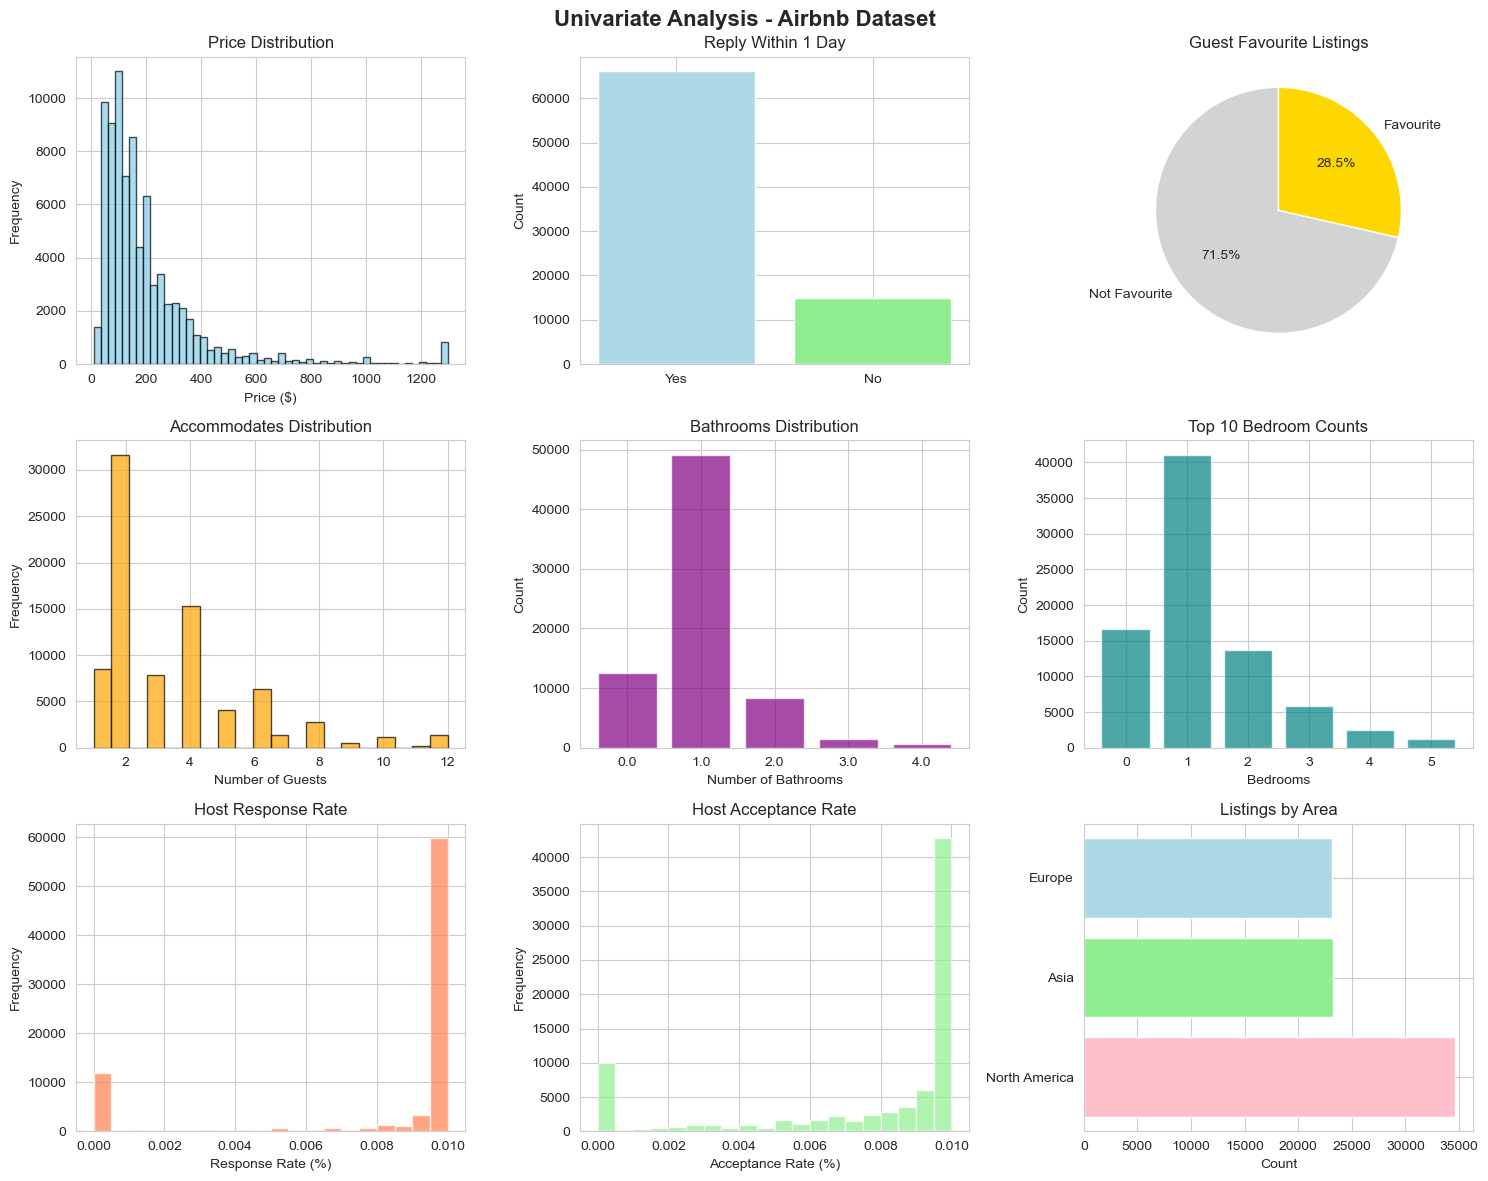

In [327]:

# Set style
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Univariate Analysis - Airbnb Dataset', fontsize=16, fontweight='bold')

# Set pastel color palette
pastel_colors = ['#FFB3BA', '#BAFFC9', '#BAE1FF']  # Pastel red, green, blue

# 1. Price distribution
axes[0,0].hist(df['price'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0,0].set_title('Price Distribution')
axes[0,0].set_xlabel('Price ($)')
axes[0,0].set_ylabel('Frequency')

# 2. Reply time (binary)
reply_counts = df['reply time'].value_counts()
axes[0,1].bar(['Yes', 'No'], reply_counts, color=['lightblue', 'lightgreen'])
axes[0,1].set_title('Reply Within 1 Day')
axes[0,1].set_ylabel('Count')

# 3. Guest favourite
fav_counts = df['guest favourite'].value_counts()
axes[0,2].pie(fav_counts, labels=['Not Favourite', 'Favourite'], autopct='%1.1f%%',
              colors=['lightgray', 'gold'], startangle=90)
axes[0,2].set_title('Guest Favourite Listings')

# 4. Accommodates
axes[1,0].hist(df['accommodates'], bins=20, color='orange', edgecolor='black', alpha=0.7)
axes[1,0].set_title('Accommodates Distribution')
axes[1,0].set_xlabel('Number of Guests')
axes[1,0].set_ylabel('Frequency')

# 5. Bathrooms
bath_counts = df['bathrooms'].value_counts().sort_index()
axes[1,1].bar(bath_counts.index.astype(str), bath_counts.values, color='purple', alpha=0.7)
axes[1,1].set_title('Bathrooms Distribution')
axes[1,1].set_xlabel('Number of Bathrooms')
axes[1,1].set_ylabel('Count')

# 6. Bedrooms
bed_counts = df['bedrooms'].value_counts().sort_index().head(10)
axes[1,2].bar(bed_counts.index.astype(str), bed_counts.values, color='teal', alpha=0.7)
axes[1,2].set_title('Top 10 Bedroom Counts')
axes[1,2].set_xlabel('Bedrooms')
axes[1,2].set_ylabel('Count')

# 7. Host response rate
axes[2,0].hist(df['host response rate'], bins=20, color='coral', alpha=0.7)
axes[2,0].set_title('Host Response Rate')
axes[2,0].set_xlabel('Response Rate (%)')
axes[2,0].set_ylabel('Frequency')

# 8. Host acceptance rate
axes[2,1].hist(df['host acceptance rate'], bins=20, color='lightgreen', alpha=0.7)
axes[2,1].set_title('Host Acceptance Rate')
axes[2,1].set_xlabel('Acceptance Rate (%)')
axes[2,1].set_ylabel('Frequency')

# 9. Area distribution
area_counts = df['area'].value_counts()
axes[2,2].barh(area_counts.index, area_counts.values, color=['pink', 'lightgreen', 'lightblue'])
axes[2,2].set_title('Listings by Area')
axes[2,2].set_xlabel('Count')

plt.tight_layout()
plt.show()



In [ ]:
# Additional univariate stats
print("="*50)
print("KEY STATISTICS:")
print("="*50)
print(f"Average price: ${df['price'].mean():.2f}")
print(f"Median price: ${df['price'].median():.2f}")
print(f"Reply rate within 1 day: {(df['reply time'].mean()*100):.1f}%")
print(f"Guest favourite listings: {(df['guest favourite'].mean()*100):.1f}%")
print(f"Average accommodates: {df['accommodates'].mean():.1f}")
print(f"Most common area: {df['area'].mode()[0]} ({area_counts.max():,} listings)")

In [ ]:
# Top 10 cities
top_cities = df['city'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_cities.plot(kind='bar', color='steelblue')
plt.title('Top 10 Cities by Listing Count')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Set style
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Price Relationships', fontsize=14, fontweight='bold')

# 1. Price vs Area
sns.boxplot(data=df, x='area', y='price', hue='area', legend=False,
            palette=['#FFB3BA', '#BAFFC9', '#BAE1FF'], ax=axes[0])
axes[0].set_title('Price Distribution by Area')
axes[0].set_xlabel('Area')
axes[0].set_ylabel('Price ($)')
axes[0].tick_params(axis='x', rotation=45)

# 2. Price vs Accommodates
sns.regplot(data=df, x='accommodates', y='price', ax=axes[1],
            scatter_kws={'alpha':0.3, 'color':'#FFB3BA'},
            line_kws={'color':'red'})
axes[1].set_title('Price vs Accommodates')
axes[1].set_xlabel('Accommodates')
axes[1].set_ylabel('Price ($)')

# 3. Price vs Bedrooms
sns.boxplot(data=df, x='bedrooms', y='price', ax=axes[2],
            color='#BAE1FF')
axes[2].set_title('Price by Bedrooms')
axes[2].set_xlabel('Bedrooms')
axes[2].set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Host & Guest Behavior Analysis', fontsize=14, fontweight='bold')

# 1. Reply Time vs Guest Favourite
cross_tab = pd.crosstab(df['reply time'], df['guest favourite'], normalize='index')
sns.heatmap(cross_tab, annot=True, fmt='.2%', cmap='RdYlGn',
            ax=axes[0], cbar_kws={'label': 'Percentage'})
axes[0].set_title('Reply Time vs Guest Favourite')
axes[0].set_xlabel('Guest Favourite')
axes[0].set_ylabel('Reply Within 1 Day')
axes[0].set_xticklabels(['No', 'Yes'])
axes[0].set_yticklabels(['No', 'Yes'])

# 2. Host Response vs Acceptance Rate
axes[1].scatter(df['host response rate'], df['host acceptance rate'],
                alpha=0.3, color='#BAE1FF')
axes[1].set_title('Host Response vs Acceptance Rate')
axes[1].set_xlabel('Response Rate')
axes[1].set_ylabel('Acceptance Rate')
# Add correlation line
z = np.polyfit(df['host response rate'], df['host acceptance rate'], 1)
p = np.poly1d(z)
axes[1].plot(df['host response rate'], p(df['host response rate']),
             "r--", alpha=0.8)

# 3. Reviews by Area
sns.boxplot(data=df, x='area', y='total reviewers number', hue='area',
            legend=False, palette=['#FFB3BA', '#BAFFC9', '#BAE1FF'],
            ax=axes[2])
axes[2].set_title('Reviews Distribution by Area')
axes[2].set_xlabel('Area')
axes[2].set_ylabel('Number of Reviews')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Create figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Correlations & Distributions', fontsize=14, fontweight='bold')

# 1. Correlation Heatmap
corr_cols = ['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
             'host response rate', 'host acceptance rate', 'total reviewers number']
corr_matrix = df[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, ax=axes[0], square=True)
axes[0].set_title('Feature Correlation Heatmap')

# 2. Price distribution by key features
# Create a combined violin plot (fixed warning)
plot_data = pd.melt(df[['price', 'accommodates', 'bedrooms', 'bathrooms']], 
                    value_vars=['accommodates', 'bedrooms', 'bathrooms'],
                    var_name='feature', value_name='value')
sns.violinplot(data=plot_data, x='feature', y='value', hue='feature',
               legend=False, palette=['#FFB3BA', '#BAFFC9', '#BAE1FF'], 
               ax=axes[1])
axes[1].set_title('Distribution of Key Features')
axes[1].set_xlabel('Feature')
axes[1].set_ylabel('Value')

plt.tight_layout()
plt.show()

In [ ]:
# Create figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Property Features Relationships', fontsize=14, fontweight='bold')

# 1. Accommodates vs Bathrooms (colored by Price)
scatter1 = axes[0].scatter(df['accommodates'], df['bathrooms'],
                          c=df['price'], cmap='viridis', alpha=0.6, s=20)
axes[0].set_title('Accommodates vs Bathrooms\n(colored by Price)', fontsize=12)
axes[0].set_xlabel('Accommodates')
axes[0].set_ylabel('Bathrooms')
plt.colorbar(scatter1, ax=axes[0], label='Price ($)')

# 2. Bedrooms vs Beds (colored by Area, sized by Price)
scatter2 = sns.scatterplot(data=df.sample(1000), x='bedrooms', y='beds',
                          hue='area', size='price', sizes=(20, 200),
                          palette=['#FFB3BA', '#BAFFC9', '#BAE1FF'],
                          alpha=0.6, ax=axes[1])
axes[1].set_title('Bedrooms vs Beds\n(color=Area, size=Price)', fontsize=12)
axes[1].set_xlabel('Bedrooms')
axes[1].set_ylabel('Beds')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Area')

plt.tight_layout()
plt.show()


In [ ]:
# Save the fully cleaned dataset to CSV
output_filename = 'airbnb_data_cleaned.csv'
df.to_csv(output_filename, index=False)

In [ ]:
# Apply log transform to handle skewness
df['price_log'] = np.log1p(df['price'])

# Compare distributions
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=50, alpha=0.7)
plt.title('Original Price')

plt.subplot(1, 2, 2)
plt.hist(df['price_log'], bins=50, alpha=0.7)
plt.title('Log-Transformed Price')
plt.show()

In [ ]:
# Boxplot comparison

plt.subplot(1, 3, 3)
box_plot = plt.boxplot([df['price'], df['price_log']])
plt.xticks([1, 2], ['Original', 'Log-Transformed'])
plt.title('Price Distribution Comparison')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [ ]:
# Compare statistics before and after log transformation
print("PRICE DISTRIBUTION - BEFORE vs AFTER LOG TRANSFORMATION")
print("="*60)
print(f"{'':<20} {'Original':<15} {'Log-Transformed':<15}")
print("-" * 60)
print(f"{'Mean':<20} {df['price'].mean():<15.2f} {df['price_log'].mean():<15.2f}")
print(f"{'Median':<20} {df['price'].median():<15.2f} {df['price_log'].median():<15.2f}")
print(f"{'Std Dev':<20} {df['price'].std():<15.2f} {df['price_log'].std():<15.2f}")
print(f"{'Skewness':<20} {df['price'].skew():<15.2f} {df['price_log'].skew():<15.2f}")
print(f"{'Min':<20} {df['price'].min():<15.2f} {df['price_log'].min():<15.2f}")
print(f"{'Max':<20} {df['price'].max():<15.2f} {df['price_log'].max():<15.2f}")

Summary of Log Transformation Results:

The log transformation successfully normalized the price distribution:

Reduced Skewness: Dramatically decreased from 19.1 (highly right-skewed) to 0.56 (near-normal)
Stabilized Variance: Standard deviation reduced from 349.74 to 0.74
Outlier Impact: Eliminated the extreme influence of the $20,000 maximum price
Central Tendency: Mean and median converged at 5.04, indicating symmetric distribution
The transformation converted the heavily skewed price data into a well-behaved, approximately normal distribution suitable for statistical analysis and modeling.

In [ ]:
# Check categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", list(categorical_cols))

# Encode high-cardinality vs low-cardinality
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

In [ ]:
df['host response rate'].describe()

In [ ]:
# High-cardinality columns (too many unique values)
high_cardinality = ['name', 'host_name']  

# Option: Drop or keep as identifiers (usually not useful for modeling)
df = df.drop(columns=['name', 'host_name'])
print("Dropped high-cardinality columns: name, host_name")

In [ ]:
# Medium-cardinality columns
medium_cardinality = ['consumer', 'bathrooms', 'host response rate', 'host acceptance rate']

# Check if these are actually numerical
print("Data types of medium-cardinality columns:")
for col in medium_cardinality:
    print(f"{col}: {df[col].dtype}")
    print(f"Sample values: {df[col].head(3).tolist()}")

In [ ]:
# Convert comma decimals to dot decimals and make numerical
columns_to_convert = ['consumer', 'bathrooms', 'host response rate', 'host acceptance rate']

for col in columns_to_convert:
    print(f"Converting {col}:")
    print(f"  Before - dtype: {df[col].dtype}, sample: {df[col].head(3).tolist()}")
    
    # Replace comma with dot and convert to float
    df[col] = df[col].astype(str).str.replace(',', '.').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    print(f"  After - dtype: {df[col].dtype}, sample: {df[col].head(3).tolist()}")
    print(f"  Missing values: {df[col].isnull().sum()}\n")

In [ ]:
# Since consumer had high missing values originally, check the results
print("Consumer column summary after conversion:")
print(f"Unique values: {df['consumer'].nunique()}")
print(f"Range: {df['consumer'].min()} - {df['consumer'].max()}")
print(f"Missing: {df['consumer'].isnull().sum()}")

In [ ]:
# Now encode the true categorical columns
categorical_cols = ['city', 'area']

print("Before one-hot encoding:")
print(f"Dataset shape: {df.shape}")

df = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols)

print("After one-hot encoding:")
print(f"Dataset shape: {df.shape}")
print(f"New columns created: {[col for col in df.columns if any(col.startswith(prefix) for prefix in categorical_cols)]}")

In [ ]:
# Since we already created a missing flag, let's use it
if 'consumer_missing_flag' in df.columns:
    print("Using existing missing flag strategy")
    # Fill missing values with median of non-missing
    consumer_median = df.loc[df['consumer_missing_flag'] == 0, 'consumer'].median()
    df['consumer'] = df['consumer'].fillna(consumer_median)
    print(f"Filled {df['consumer'].isnull().sum()} remaining missing values with median: {consumer_median}")
else:
    # Create missing flag and impute
    df['consumer_missing_flag'] = df['consumer'].isnull().astype(int)
    consumer_median = df['consumer'].median()
    df['consumer'] = df['consumer'].fillna(consumer_median)
    print(f"Created missing flag and filled missing values with median: {consumer_median}")

print(f"Final consumer missing: {df['consumer'].isnull().sum()}")

In [ ]:
df.columns

In [ ]:
df['host Certification'].describe()

In [ ]:
# Remove the host Certification column since it has only one value
print(f"Before removal: {df.shape}")
df = df.drop(columns=['host Certification'])
print(f"After removal: {df.shape}")
print("✅ Removed 'host Certification' column (only one value)")

In [ ]:
# Check for other columns with zero variance
print("Checking for other low-variance columns:")
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"❌ {col}: Only 1 unique value - consider removing")
    elif df[col].nunique() == 2:
        print(f"⚠️  {col}: Only 2 unique values - check if useful")
    elif df[col].nunique() <= 5:
        print(f"✅ {col}: {df[col].nunique()} unique values")

# Also check for columns with very high missing rate (>80%)
print("\nChecking for high missing rate columns:")
for col in df.columns:
    missing_pct = df[col].isnull().sum() / len(df) * 100
    if missing_pct > 80:
        print(f"⚠️  {col}: {missing_pct:.1f}% missing - consider removing")

In [ ]:
df['guest favourite'].describe()

In [ ]:
print("DATA CONSISTENCY CHECKS:")
print("="*50)

# 1. Check bedroom vs beds logic
print("1. Bedroom vs Beds Consistency:")
inconsistent_beds = df[df['beds'] < df['bedrooms']]
print(f"   Records where beds < bedrooms: {len(inconsistent_beds)}")

# 2. Check accommodates vs bedrooms/beds
print("\n2. Accommodates Capacity:")
too_small = df[df['accommodates'] < df['bedrooms']]
print(f"   Accommodates < bedrooms: {len(too_small)}")
too_small_beds = df[df['accommodates'] < df['beds']]
print(f"   Accommodates < beds: {len(too_small_beds)}")

# 3. Check price合理性
print("\n3. Price Reasonableness:")
price_stats = df['price'].describe()
print(f"   Price range: ${price_stats['min']:.2f} - ${price_stats['max']:.2f}")
print(f"   Median price: ${price_stats['50%']:.2f}")

# Check for suspiciously low/high prices
suspicious_low = df[df['price'] < 10]  # Less than $10
suspicious_high = df[df['price'] > 10000]  # More than $10,000
print(f"   Prices < $10: {len(suspicious_low)}")
print(f"   Prices > $10,000: {len(suspicious_high)}")

In [ ]:
print("\n4. Temporal Consistency:")
# Check host since dates if available
if 'host since' in df.columns:
    df['host since'] = pd.to_datetime(df['host since'])
    future_dates = df[df['host since'] > pd.Timestamp.now()]
    print(f"   Future host since dates: {len(future_dates)}")
    
    # Check if host experience makes sense
    df['host_experience_days'] = (pd.Timestamp.now() - df['host since']).dt.days
    negative_experience = df[df['host_experience_days'] < 0]
    print(f"   Negative host experience: {len(negative_experience)}")

In [ ]:
print("\n5. Rate Consistency:")
# Check if rates are within valid ranges (0-1 or 0-100)
rate_columns = ['host response rate', 'host acceptance rate']

for col in rate_columns:
    if col in df.columns:
        invalid_rates = df[(df[col] < 0) | (df[col] > 1)]
        print(f"   {col} outside [0,1] range: {len(invalid_rates)}")
        
        # Check if any are exactly 0 or 1 (might be data issues)
        zero_rates = df[df[col] == 0]
        one_rates = df[df[col] == 1]
        print(f"   {col} = 0: {len(zero_rates)}, = 1: {len(one_rates)}")

In [ ]:
print("\n6. Geographical Consistency:")
# Check if city and area assignments make sense
if 'city_Amsterdam' in df.columns and 'area_Europe' in df.columns:
    # Amsterdam should be in Europe
    amsterdam_not_europe = df[(df['city_Amsterdam'] == 1) & (df['area_Europe'] == 0)]
    print(f"   Amsterdam listings not in Europe: {len(amsterdam_not_europe)}")

# Check for listings with no geographical assignment
if any(col.startswith('city_') for col in df.columns):
    city_cols = [col for col in df.columns if col.startswith('city_')]
    no_city = df[df[city_cols].sum(axis=1) == 0]
    print(f"   Listings with no city assignment: {len(no_city)}")

In [ ]:
# Save the fully cleaned dataset to CSV
output_filename = 'airbnb_data_cleaned_final.csv'
df.to_csv(output_filename, index=False)

print("✅ DATASET SUCCESSFULLY SAVED!")